[1.00282647 1.00615543 1.00638317 1.00941036 1.00966374 1.01437774
 1.01457666 1.01497637 1.01501147 1.01612146 1.01774858 1.02083709
 1.0224348  1.02738839 1.02895546 1.02958744 1.03065861 1.03452372
 1.03635319 1.04317165 1.04458942 1.04616834 1.04643069 1.0525368
 1.05383424 1.05500356 1.0552636  1.05671725 1.05990321 1.06020504
 1.06325839 1.06832846 1.0692842  1.06937436 1.07181652 1.07528857
 1.07654624 1.0797755  1.07988109 1.08991438 1.09008403 1.09144998
 1.0936394  1.09813118 1.10942338 1.1274446  1.13263056 1.13427952
 1.13510482 1.1384539  1.14131643 1.14463218 1.14495578 1.15075841
 1.15638401 1.16222781 1.17756889 1.18870188 1.20221284 1.21271862
 1.22190213 1.22611604 1.23581039 1.23883974 1.24386792 1.24881931
 1.27894787 1.28044225 1.2850152  1.29093588 1.3056657  1.3093949
 1.32337258 1.32473274 1.33085795 1.35131404 1.3547873  1.36614516
 1.38413965 1.39286641 1.39971674 1.41459609 1.45355189 1.48141145
 1.49723754 1.50440406 1.61500103 1.66468821 1.74643115 1.818728

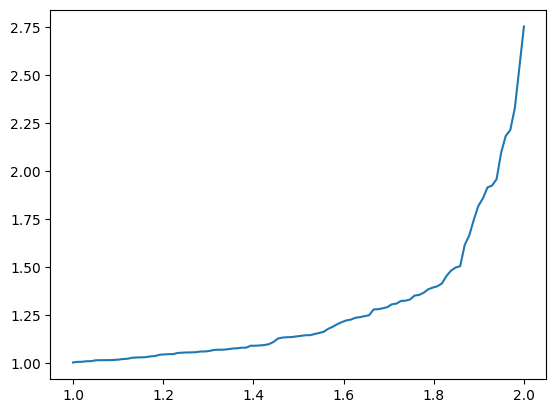

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
theta = 5
ma = np.random.uniform(0, 1, 100)
ma = (1 - ma) ** (1 / (1 - theta))
ma.sort()

print(ma)

x = np.linspace(1, 2, 100)
plt.plot(x, ma)

ma = np.array([1.00187402, 1.0027471,  1.00784191, 1.00828649, 1.00924825, 1.0102091,
 1.01379202, 1.01611315, 1.02321378, 1.02669065, 1.02722453, 1.029145,
 1.03915381, 1.04129392, 1.04139285, 1.05120978, 1.05148616, 1.05164126,
 1.05173239, 1.06411434, 1.0663984, 1.06947233, 1.0726828,  1.07459465,
 1.07499991, 1.07609387, 1.07710918, 1.08476952, 1.08485632, 1.09617972,
 1.09698351, 1.10724568, 1.11239777, 1.1201768,  1.12153386, 1.12659561,
 1.13901227, 1.14394477, 1.14474469, 1.1484811,  1.14972783, 1.16164021,
 1.16889902, 1.16971202, 1.17823494, 1.1856323,  1.18890424, 1.194868,
 1.19692178, 1.19721379, 1.20113811, 1.20570196, 1.21601561, 1.2178718,
 1.22474677 ,1.22493236 ,1.22565487, 1.22803344, 1.22858718, 1.23789454,
 1.24384838, 1.24456786, 1.24504849, 1.2482387,  1.26484928, 1.27392685,
 1.28066228, 1.28614057, 1.2935196,  1.31710825, 1.32474339, 1.33869637,
 1.34368408, 1.34481713, 1.36259742, 1.41165893, 1.44664055, 1.45250432,
 1.4542177,  1.45944167, 1.47278101, 1.51870957, 1.52192534, 1.57358261,
 1.6201469,  1.66889521, 1.75735354, 1.76404957, 1.76604034, 1.89805975,
 1.91685386, 2.0189005,  2.1170887,  2.23052128, 2.28631429, 2.42646438,
 2.62695171, 2.85989272, 3.31997127, 3.80511003])

In [ ]:
import math

theta_with_wave = 1 + 100 / (np.sum(np.log(ma)))
left_med = (1.96 * np.log(2) * (2 ** (1 / (theta_with_wave - 1)))) / (theta_with_wave - 1) / 10 + 2 ** (1 / (theta_with_wave -1))
print(left_med)
left_med = 1.240005606274902
right_med = (-(1.96 * np.log(2) * (2 ** (1 / (theta_with_wave - 1)))) / (theta_with_wave - 1) / 10 + 2 ** (1 / (theta_with_wave -1)))
print(right_med)
right_med = 1.1553231460676938
print((ma[49] + ma[50]) / 2)

1.2400056061316642
1.1553231459782805
1.1991759499999999


In [ ]:
import math

left = -1.96 * (theta_with_wave - 1) / 10 + theta_with_wave
right = 1.96 * (theta_with_wave - 1) / 10 + theta_with_wave
left = 4.089649696230475
right = 5.596046065536876
print(left, right)

4.089649696230475 5.596046065536876


In [ ]:
# Численно постройте бутстраповский доверительный интервал двумя способами: параметрический и непараметрический.
def parreto(theta_with_wave_p, data):
  return (1 - data) ** (1 / (1 - theta_with_wave_p))

def bootstrap_par(n_bootstrap_samples=50000):
    return [parreto(theta_with_wave, np.random.uniform(0, 1, 100)) for _ in range(n_bootstrap_samples)]

bootstrap_p = bootstrap_par()

bootstrap_p_res = []
theta_with_wave_for_btstrp_p = []

for i in bootstrap_p:
  bootstrap_p_res.append(2 ** (1 / ((1 + 100 / (np.sum(np.log(i)))) - 1)))
  theta_with_wave_for_btstrp_p.append(1 + 100 / (np.sum(np.log(i))))

bootstrap_p_res.sort()
theta_with_wave_for_btstrp_p.sort()

quantile1_ = bootstrap_p_res[1250]
quantile2_ = bootstrap_p_res[48750]

quantile_theta_1_ = theta_with_wave_for_btstrp_p[1250]
quantile_theta_2_ = theta_with_wave_for_btstrp_p[48750]

print(quantile1_, " < ", "median", " < ", quantile2_)
print("Размах = ", quantile2_ - quantile1_)

print(quantile_theta_1_, " < ", "theta", " < ", quantile_theta_2_)
print("Размах = ", quantile_theta_2_ - quantile_theta_1_)


1.1582049976333446  <  median  <  1.2430036364909898
Размах =  0.08479863885764516
4.186508696495947  <  theta  <  5.719761285364174
Размах =  1.5332525888682271


In [ ]:
def bootstrap_non_par(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

median_counted_np = 2 ** (1 / (theta_with_wave - 1))

bootstrap_n_p = bootstrap_non_par(ma)


bootstrap_n_p_res = []
theta_with_wave_for_btstrp_n_p = []
for i in bootstrap_n_p:
  bootstrap_n_p_res.append(np.median(i) - median_counted_np)
  theta_with_wave_for_btstrp_n_p.append(1 + 100 / (np.sum(np.log(i))) - theta_with_wave)

print(bootstrap_n_p_res)

bootstrap_n_p_res.sort()
theta_with_wave_for_btstrp_n_p.sort()

quantile1 = bootstrap_n_p_res[24]
quantile2 = bootstrap_n_p_res[974]

quantile_theta_1 = theta_with_wave_for_btstrp_n_p[24]
quantile_theta_2 = theta_with_wave_for_btstrp_n_p[974]

border1 = min(median_counted_np - quantile1, median_counted_np - quantile2)
border2 = max(median_counted_np - quantile1, median_counted_np - quantile2)

border_theta_1 = min(theta_with_wave - quantile_theta_1, theta_with_wave - quantile_theta_2)
border_theta_2 = max(theta_with_wave - quantile_theta_1, theta_with_wave - quantile_theta_2)

print("median = ", median_counted_np)
print(border1, " < ", "median", " < ", border2)
print("Размах = ", border2 - border1)
print("theta_with_wave = ", theta_with_wave)
print(border_theta_1, " < ", "theta", " < ", border_theta_2)
print("Размах = ", border_theta_2 - border_theta_1)


[0.029179778945027657, 0.008037583945027738, 0.01835123394502758, -0.028765356054972324, 0.027175188945027573, 0.02409895894502756, -0.015730756054972206, 0.005755658945027831, -0.01039610605497221, -0.04793654605497233, -0.004751366054972284, 0.027267983945027607, -0.005778256054972397, 0.014122503945027676, 0.027536443945027633, 0.0003386789450277039, 0.0034737339450277016, -0.028358856054972348, -0.012032076054972363, -0.005778256054972397, 0.014122503945027676, 0.0015115739450275445, 0.0015115739450275445, 0.028725728945027784, -0.0016234810549724532, 0.019279328945027485, -0.00045058605497239057, 0.0015115739450275445, 0.013194408945027769, 0.023644908945027687, -0.038350951054972215, -0.0533196460549723, 0.023170863945027653, -0.0007425960549722888, 0.020207423945027614, 0.005755658945027831, -0.007414226054972328, 0.0034737339450277016, -0.002796376054972294, -0.00045058605497239057, 0.013194408945027769, 0.008037583945027738, 0.06718490394502763, -0.005778256054972397, 0.027990

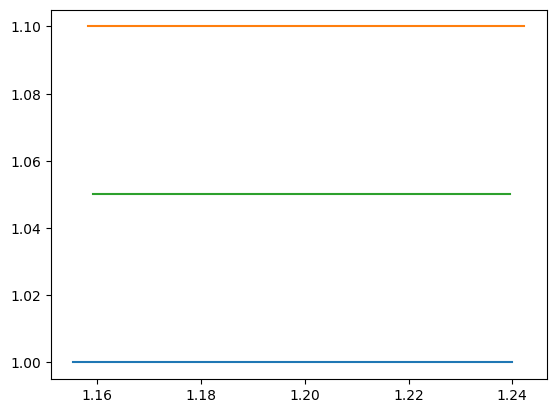

In [ ]:
x1 = np.linspace(left_med, right_med, 100)
y1 = [1] * 100

x2 = np.linspace(quantile1_, quantile2_, 100)
y2 = [1.1] * 100

x3 = np.linspace(border1, border2, 100)
y3 = [1.05] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.show()

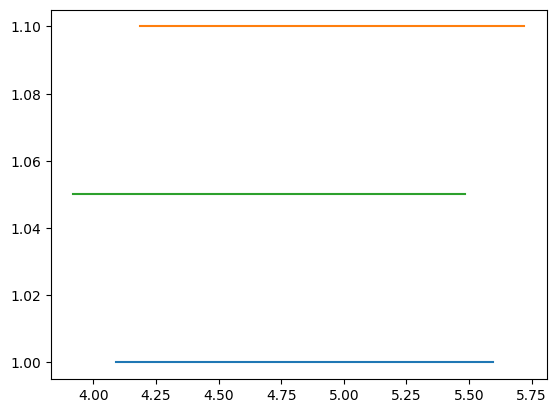

In [ ]:
x1 = np.linspace(left, right, 100)
y1 = [1] * 100

x2 = np.linspace(quantile_theta_1_, quantile_theta_2_, 100)
y2 = [1.1] * 100

x3 = np.linspace(border_theta_1, border_theta_2, 100)
y3 = [1.05] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.show()